In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pacientes= pd.read_csv("pacientesnovo.csv")

In [ ]:
pacientes.head()

,id,data_admissao,idade,peso,altura,indice_massa_corporal,sexo,tipo_sangue,doenca_cronica,hipertensao,diabetes,cirurgia,uti,pressao,dias_internado
0,1,2015-06-20,62,NaN,1.78,18.34,NaN,O+,True,False,False,False,False,97-136,10
1,2,2023-10-16,16,79.91,1.66,28.97,Masculino,B+,True,False,False,False,False,86-124,6
2,3,2020-08-16,72,77.13,1.55,NaN,Masculino,A+,True,False,False,False,False,90-105,6
3,4,2018-09-08,32,89.78,1.61,34.63,NaN,O+,False,False,False,False,False,116-181,4
4,5,2012-04-07,83,66.85,1.57,NaN,Feminino,B+,False,True,True,False,False,102-165,7


In [ ]:
for col in pacientes.columns:
    pacientes[col] = pacientes[col].replace('NaN', np.nan)

# 1. Analise de dados ausentes

In [ ]:
pacientes.isnull().sum()

,0
id,0
data_admissao,0
idade,0
peso,60
altura,25
indice_massa_corporal,139
sexo,125
tipo_sangue,25
doenca_cronica,0
hipertensao,32


In [ ]:
!pip install feature-engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 34.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.2.2 which is incompatible.


In [ ]:
import feature_engine
print(feature_engine.__version__)

1.8.0


In [ ]:
# Calcular o número de valores ausentes e a porcentagem
num_valores_ausentes = pacientes.isnull().sum()
ausentes_porcentagem = (num_valores_ausentes / len(pacientes)) * 100

# Criar a lista de tuplas com o nome da coluna, número de dados ausentes e porcentagem
missing_info = [(col, num_valores_ausentes[col], ausentes_porcentagem[col]) for col in pacientes.columns if num_valores_ausentes[col] > 0]

# Imprimir a informação
for col, num_valores_ausentes, ausentes_porcentagem in missing_info:
    print(f"Coluna: {col}, Dados ausentes: {num_valores_ausentes}, Porcentagem: {ausentes_porcentagem:.2f}%")

Coluna: peso, Dados ausentes: 60, Porcentagem: 12.00%
Coluna: altura, Dados ausentes: 25, Porcentagem: 5.00%
Coluna: indice_massa_corporal, Dados ausentes: 139, Porcentagem: 27.80%
Coluna: sexo, Dados ausentes: 125, Porcentagem: 25.00%
Coluna: tipo_sangue, Dados ausentes: 25, Porcentagem: 5.00%
Coluna: hipertensao, Dados ausentes: 32, Porcentagem: 6.40%
Coluna: diabetes, Dados ausentes: 67, Porcentagem: 13.40%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from  feature_engine.imputation import CategoricalImputer
from feature_engine.imputation import MeanMedianImputer

In [ ]:
import pandas as pd
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer



# Definir imputadores para as colunas numéricas e categóricas
mean_imputer = MeanMedianImputer(imputation_method='mean', variables=['peso', 'altura'])
median_imputer = MeanMedianImputer(imputation_method='median', variables=['indice_massa_corporal'])
categorical_imputer = CategoricalImputer(imputation_method='frequent', variables=['tipo_sangue', 'hipertensao', 'diabetes', 'sexo'])

# Aplicar imputação
pacientes = mean_imputer.fit_transform(pacientes)
pacientes = median_imputer.fit_transform(pacientes)
pacientes = categorical_imputer.fit_transform(pacientes)

In [ ]:
pacientes.isnull().sum()

,0
id,0
data_admissao,0
idade,0
peso,0
altura,0
indice_massa_corporal,0
sexo,0
tipo_sangue,0
doenca_cronica,0
hipertensao,0


In [ ]:
pacientes['sexo'].unique()

array(['Masculino', 'Feminino'], dtype=object)

In [ ]:
pacientes.head()

,id,data_admissao,idade,peso,altura,indice_massa_corporal,sexo,tipo_sangue,doenca_cronica,hipertensao,diabetes,cirurgia,uti,pressao,dias_internado
0,1,2015-06-20,62,71.36125,1.78,18.34,Masculino,O+,True,False,False,False,False,97-136,10
1,2,2023-10-16,16,79.91000,1.66,28.97,Masculino,B+,True,False,False,False,False,86-124,6
2,3,2020-08-16,72,77.13000,1.55,24.49,Masculino,A+,True,False,False,False,False,90-105,6
3,4,2018-09-08,32,89.78000,1.61,34.63,Masculino,O+,False,False,False,False,False,116-181,4
4,5,2012-04-07,83,66.85000,1.57,24.49,Feminino,B+,False,True,True,False,False,102-165,7


In [ ]:
# Calcular o número de valores ausentes e a porcentagem
num_valores_ausentes = pacientes.isnull().sum()
ausentes_porcentagem = (num_valores_ausentes / len(pacientes)) * 100

# Criar a lista de tuplas com o nome da coluna, número de dados ausentes e porcentagem
missing_info = [(col, num_valores_ausentes[col], ausentes_porcentagem[col]) for col in pacientes.columns if num_valores_ausentes[col] > 0]

# Imprimir a informação
for col, num_valores_ausentes, ausentes_porcentagem in missing_info:
    print(f"Coluna: {col}, Dados ausentes: {num_valores_ausentes}, Porcentagem: {ausentes_porcentagem:.2f}%")

## Análise de Outliers

In [ ]:
pacientes[['pressao_min', 'pressao_max']] = pacientes['pressao'].str.split('-', expand=True).astype(float)

pacientes.drop(columns=['pressao'],inplace= True)

In [ ]:
def identify_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outliers[col] = len(outlier_indices)
    return outliers

In [ ]:
import pandas as pd

# Função para identificar outliers
def identify_outliers(df, num_cols):
    outliers = {}
    for col in num_cols:
        # Calcular Q1 (primeiro quartil) e Q3 (terceiro quartil)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1  # Intervalo interquartil

        # Definir limites para outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificar outliers
        outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        outliers[col] = outlier_count
    return outliers

# Supondo que o DataFrame já esteja carregado na variável `pacientes`
# Selecionar apenas as colunas numéricas
num_cols = pacientes.select_dtypes(include=['float64', 'int64']).columns

# Identificar outliers
outliers = identify_outliers(pacientes, num_cols)

# Exibir o número de outliers por coluna
print("Número de outliers por coluna:")
for col, count in outliers.items():
    print(f"{col}: {count} outliers")


Número de outliers por coluna:
id: 0 outliers
idade: 0 outliers
peso: 9 outliers
altura: 3 outliers
indice_massa_corporal: 33 outliers
dias_internado: 2 outliers
pressao_min: 5 outliers
pressao_max: 0 outliers


In [ ]:
print(pacientes.dtypes)

id                         int64
data_admissao             object
idade                      int64
peso                     float64
altura                   float64
indice_massa_corporal    float64
sexo                      object
tipo_sangue               object
doenca_cronica              bool
hipertensao                 bool
diabetes                    bool
cirurgia                    bool
uti                         bool
dias_internado             int64
pressao_min              float64
pressao_max              float64
dtype: object


In [ ]:
from feature_engine.outliers import Winsorizer

In [ ]:
winsorizador = Winsorizer(capping_method="quantiles",tail='both',missing_values = 'ignore', variables=['peso','altura','indice_massa_corporal','dias_internado','pressao_min'])

In [ ]:
winsorizador.fit(pacientes)

Winsorizer(capping_method='quantiles', missing_values='ignore', tail='both',
           variables=['peso', 'altura', 'indice_massa_corporal',
                      'dias_internado', 'pressao_min'])

In [ ]:
pacientes = winsorizador.transform(pacientes)

In [ ]:
num_cols = pacientes.select_dtypes(include=['float64', 'int64']).columns

# Identificar outliers
outliers_sem = identify_outliers(pacientes, num_cols)

# Exibir o número de outliers por coluna
print("Número de outliers por coluna:")
for col, count in outliers_sem.items():
    print(f"{col}: {count} outliers")

Número de outliers por coluna:
id: 0 outliers
idade: 0 outliers
peso: 0 outliers
altura: 0 outliers
indice_massa_corporal: 0 outliers
dias_internado: 0 outliers
pressao_min: 0 outliers
pressao_max: 0 outliers


## Engenharia de features temporais

In [ ]:
tipos = pacientes.dtypes.reset_index()
tipos.columns = ['coluna','tipo']

In [ ]:
pacientes['data_admissao'] = pd.to_datetime(pacientes['data_admissao'], format='%Y-%m-%d')

In [ ]:
pacientes.head()

,id,data_admissao,idade,peso,altura,indice_massa_corporal,sexo,tipo_sangue,doenca_cronica,hipertensao,diabetes,cirurgia,uti,dias_internado,pressao_min,pressao_max
0,1,2015-06-20,62,71.36125,1.78,18.3400,Masculino,O+,True,False,False,False,False,10,97.0,136.0
1,2,2023-10-16,16,79.91000,1.66,28.9700,Masculino,B+,True,False,False,False,False,6,86.0,124.0
2,3,2020-08-16,72,77.13000,1.55,24.4900,Masculino,A+,True,False,False,False,False,6,90.0,105.0
3,4,2018-09-08,32,89.78000,1.61,34.0305,Masculino,O+,False,False,False,False,False,4,116.0,181.0
4,5,2012-04-07,83,66.85000,1.57,24.4900,Feminino,B+,False,True,True,False,False,7,102.0,165.0


In [ ]:
pacientes['Ano'] = pacientes['data_admissao'].dt.year
pacientes['Mês'] = pacientes['data_admissao'].dt.month
pacientes['Dia'] = pacientes['data_admissao'].dt.day_name()

In [ ]:
dias_semana = {
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira',
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

pacientes['Dia'] = pacientes['Dia'].map(dias_semana)

In [ ]:
pacientes.drop(columns=['data_admissao'],inplace=True)

In [ ]:
pacientes.head()

,id,idade,peso,altura,indice_massa_corporal,sexo,tipo_sangue,doenca_cronica,hipertensao,diabetes,cirurgia,uti,dias_internado,pressao_min,pressao_max,Ano,Mês,Dia
0,1,62,71.36125,1.78,18.3400,Masculino,O+,True,False,False,False,False,10,97.0,136.0,2015,6,Sábado
1,2,16,79.91000,1.66,28.9700,Masculino,B+,True,False,False,False,False,6,86.0,124.0,2023,10,Segunda-feira
2,3,72,77.13000,1.55,24.4900,Masculino,A+,True,False,False,False,False,6,90.0,105.0,2020,8,Domingo
3,4,32,89.78000,1.61,34.0305,Masculino,O+,False,False,False,False,False,4,116.0,181.0,2018,9,Sábado
4,5,83,66.85000,1.57,24.4900,Feminino,B+,False,True,True,False,False,7,102.0,165.0,2012,4,Sábado


## Criação de novas features

In [ ]:
pacientes['idade_avancada'] = pacientes['idade'] > 65

In [ ]:
pacientes.head()

,id,idade,peso,altura,indice_massa_corporal,sexo,tipo_sangue,doenca_cronica,hipertensao,diabetes,cirurgia,uti,dias_internado,pressao_min,pressao_max,Ano,Mês,Dia,idade_avancada
0,1,62,71.36125,1.78,18.3400,Masculino,O+,True,False,False,False,False,10,97.0,136.0,2015,6,Sábado,False
1,2,16,79.91000,1.66,28.9700,Masculino,B+,True,False,False,False,False,6,86.0,124.0,2023,10,Segunda-feira,False
2,3,72,77.13000,1.55,24.4900,Masculino,A+,True,False,False,False,False,6,90.0,105.0,2020,8,Domingo,True
3,4,32,89.78000,1.61,34.0305,Masculino,O+,False,False,False,False,False,4,116.0,181.0,2018,9,Sábado,False
4,5,83,66.85000,1.57,24.4900,Feminino,B+,False,True,True,False,False,7,102.0,165.0,2012,4,Sábado,True


In [ ]:
def categorize_imc(imc):
    if pd.isna(imc):
        return 'Desconhecido'
    elif imc < 18.5:
        return 'Abaixo do peso'
    elif 18.5 <= imc < 25:
        return 'Normal'
    elif 25 <= imc < 30:
        return 'Sobrepeso'
    else:
        return 'Obeso'

In [ ]:
pacientes['imc_categoria'] = pacientes['indice_massa_corporal'].apply(categorize_imc)

In [ ]:
pacientes.head()

,id,idade,peso,altura,indice_massa_corporal,sexo,tipo_sangue,doenca_cronica,hipertensao,diabetes,cirurgia,uti,dias_internado,pressao_min,pressao_max,Ano,Mês,Dia,idade_avancada,imc_categoria
0,1,62,71.36125,1.78,18.3400,Masculino,O+,True,False,False,False,False,10,97.0,136.0,2015,6,Sábado,False,Abaixo do peso
1,2,16,79.91000,1.66,28.9700,Masculino,B+,True,False,False,False,False,6,86.0,124.0,2023,10,Segunda-feira,False,Sobrepeso
2,3,72,77.13000,1.55,24.4900,Masculino,A+,True,False,False,False,False,6,90.0,105.0,2020,8,Domingo,True,Normal
3,4,32,89.78000,1.61,34.0305,Masculino,O+,False,False,False,False,False,4,116.0,181.0,2018,9,Sábado,False,Obeso
4,5,83,66.85000,1.57,24.4900,Feminino,B+,False,True,True,False,False,7,102.0,165.0,2012,4,Sábado,True,Normal


In [ ]:
pacientes['admissao_fim_semana'] = pacientes['Dia'].isin(['Sexta-feira', 'Sábado'])
pacientes['internacao_fase_ferias'] = pacientes['Mês'].isin([6, 7])

In [ ]:
pacientes.head()

,id,idade,peso,altura,indice_massa_corporal,sexo,tipo_sangue,doenca_cronica,hipertensao,diabetes,...,dias_internado,pressao_min,pressao_max,Ano,Mês,Dia,idade_avancada,imc_categoria,admissao_fim_semana,internacao_fase_ferias
0,1,62,71.36125,1.78,18.3400,Masculino,O+,True,False,False,...,10,97.0,136.0,2015,6,Sábado,False,Abaixo do peso,True,True
1,2,16,79.91000,1.66,28.9700,Masculino,B+,True,False,False,...,6,86.0,124.0,2023,10,Segunda-feira,False,Sobrepeso,False,False
2,3,72,77.13000,1.55,24.4900,Masculino,A+,True,False,False,...,6,90.0,105.0,2020,8,Domingo,True,Normal,False,False
3,4,32,89.78000,1.61,34.0305,Masculino,O+,False,False,False,...,4,116.0,181.0,2018,9,Sábado,False,Obeso,True,False
4,5,83,66.85000,1.57,24.4900,Feminino,B+,False,True,True,...,7,102.0,165.0,2012,4,Sábado,True,Normal,True,False


## Análise de Raridade das Features

In [ ]:
def categoria_rara(df, columns, threshold=0.05):
    rare_categories = {}

    for col in columns:
        # Calcular a frequência das categorias
        freq = df[col].value_counts(normalize=True)

        # Identificar categorias raras
        rare = freq[freq < threshold].index

        if not rare.empty:
            rare_categories[col] = rare.tolist()

    return rare_categories

# Identificar categorias raras
rare_categories = categoria_rara(pacientes,['tipo_sangue','imc_categoria','Dia'] , threshold=0.05)

# Exibir as categorias raras
print("Categorias raras em cada coluna:")
for col, categories in rare_categories.items():
    print(f"{col}: {categories}")

Categorias raras em cada coluna:
tipo_sangue: ['AB+', 'AB-', 'B-']


In [ ]:
pacientes["tipo_sangue"].value_counts()

,count
tipo_sangue,
O+,218
A+,139
B+,41
O-,38
A-,29
AB+,18
AB-,10
B-,7


## Normalização e padronização

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
pacientes.head()

,id,idade,peso,altura,indice_massa_corporal,sexo,tipo_sangue,doenca_cronica,hipertensao,diabetes,...,dias_internado,pressao_min,pressao_max,Ano,Mês,Dia,idade_avancada,imc_categoria,admissao_fim_semana,internacao_fase_ferias
0,1,62,71.36125,1.78,18.3400,Masculino,O+,True,False,False,...,10,97.0,136.0,2015,6,Sábado,False,Abaixo do peso,True,True
1,2,16,79.91000,1.66,28.9700,Masculino,B+,True,False,False,...,6,86.0,124.0,2023,10,Segunda-feira,False,Sobrepeso,False,False
2,3,72,77.13000,1.55,24.4900,Masculino,A+,True,False,False,...,6,90.0,105.0,2020,8,Domingo,True,Normal,False,False
3,4,32,89.78000,1.61,34.0305,Masculino,O+,False,False,False,...,4,116.0,181.0,2018,9,Sábado,False,Obeso,True,False
4,5,83,66.85000,1.57,24.4900,Feminino,B+,False,True,True,...,7,102.0,165.0,2012,4,Sábado,True,Normal,True,False


In [ ]:
pacientes['sexo'].unique()

array(['Masculino', 'Feminino'], dtype=object)

In [ ]:
pacientes.dtypes

,0
id,int64
idade,int64
peso,float64
altura,float64
indice_massa_corporal,float64
sexo,object
tipo_sangue,object
doenca_cronica,bool
hipertensao,bool
diabetes,bool


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Definir as variáveis numéricas
variaveis_numericas = ['idade', 'peso', 'altura', 'indice_massa_corporal', 'pressao_min', 'pressao_max']

# Criar o objeto StandardScaler
standard_scaler = StandardScaler()

# Aplicar o scaler às variáveis numéricas
pacientes[variaveis_numericas] = standard_scaler.fit_transform(pacientes[variaveis_numericas])

# Exibir os primeiros dados normalizados
print(pacientes.head())


   id     idade      peso    altura  indice_massa_corporal       sexo  \
0   1  0.476788  0.002662  0.896610              -1.417328  Masculino   
1   2 -1.093840  0.623843 -0.463259               0.939173  Masculino   
2   3  0.818229  0.421839 -1.709806              -0.053971  Masculino   
3   4 -0.547534  1.341031 -1.029871               2.061005  Masculino   
4   5  1.193814 -0.325140 -1.483161              -0.053971   Feminino   

  tipo_sangue  doenca_cronica  hipertensao  diabetes  ...  dias_internado  \
0          O+            True        False     False  ...              10   
1          B+            True        False     False  ...               6   
2          A+            True        False     False  ...               6   
3          O+           False        False     False  ...               4   
4          B+           False         True      True  ...               7   

   pressao_min  pressao_max   Ano  Mês            Dia  idade_avancada  \
0    -0.162799    -0.6323

In [ ]:
pacientes.head()

,id,idade,peso,altura,indice_massa_corporal,sexo,tipo_sangue,doenca_cronica,hipertensao,diabetes,...,dias_internado,pressao_min,pressao_max,Ano,Mês,Dia,idade_avancada,imc_categoria,admissao_fim_semana,internacao_fase_ferias
0,1,0.476788,0.002662,0.896610,-1.417328,Masculino,O+,True,False,False,...,10,-0.162799,-0.632335,2015,6,Sábado,False,Abaixo do peso,True,True
1,2,-1.093840,0.623843,-0.463259,0.939173,Masculino,B+,True,False,False,...,6,-1.124553,-1.074219,2023,10,Segunda-feira,False,Sobrepeso,False,False
2,3,0.818229,0.421839,-1.709806,-0.053971,Masculino,A+,True,False,False,...,6,-0.774824,-1.773868,2020,8,Domingo,True,Normal,False,False
3,4,-0.547534,1.341031,-1.029871,2.061005,Masculino,O+,False,False,False,...,4,1.498413,1.024728,2018,9,Sábado,False,Obeso,True,False
4,5,1.193814,-0.325140,-1.483161,-0.053971,Feminino,B+,False,True,True,...,7,0.274362,0.435550,2012,4,Sábado,True,Normal,True,False


In [ ]:
pacientes_revertidos = pacientes.copy()
pacientes_revertidos[variaveis_numericas] = standard_scaler.inverse_transform(pacientes[variaveis_numericas])

# Exibir os dados revertidos

pacientes_revertidos.head()

Dados revertidos para a escala original:
   id  idade      peso  altura  indice_massa_corporal       sexo tipo_sangue  \
0   1   62.0  71.36125    1.78                18.3400  Masculino          O+   
1   2   16.0  79.91000    1.66                28.9700  Masculino          B+   
2   3   72.0  77.13000    1.55                24.4900  Masculino          A+   
3   4   32.0  89.78000    1.61                34.0305  Masculino          O+   
4   5   83.0  66.85000    1.57                24.4900   Feminino          B+   

   doenca_cronica  hipertensao  diabetes  ...  dias_internado  pressao_min  \
0            True        False     False  ...              10         97.0   
1            True        False     False  ...               6         86.0   
2            True        False     False  ...               6         90.0   
3           False        False     False  ...               4        116.0   
4           False         True      True  ...               7        102.0   

   pressa

In [ ]:
pacientes.dtypes

,0
id,int64
idade,float64
peso,float64
altura,float64
indice_massa_corporal,float64
sexo,object
tipo_sangue,object
doenca_cronica,bool
hipertensao,bool
diabetes,bool


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Supondo que o DataFrame 'pacientes' já tenha sido carregado
# Exemplo: pacientes = pd.read_csv('dados.csv')

# Criar o objeto OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Selecionar as variáveis categóricas e booleanas
variaveis_categoricas = ['sexo', 'tipo_sangue', 'Dia', 'imc_categoria']
variaveis_booleanas = ['doenca_cronica', 'hipertensao', 'diabetes', 'cirurgia', 'uti', 'idade_avancada', 'admissao_fim_semana', 'internacao_fase_ferias']

# Aplicar o OneHotEncoder apenas nas variáveis categóricas
df_categoricas = pacientes[variaveis_categoricas]
df_booleanas = pacientes[variaveis_booleanas]

# Transformar variáveis categóricas
df_encoded_categoricas = encoder.fit_transform(df_categoricas)

# Criar DataFrame a partir dos dados codificados
df_encoded_categoricas = pd.DataFrame(df_encoded_categoricas, columns=encoder.get_feature_names_out(variaveis_categoricas))

# Concatenar os dados booleanos com os dados codificados
df_final = pd.concat([df_encoded_categoricas, df_booleanas.reset_index(drop=True)], axis=1)

print("Dados após One-Hot Encoding:")
df_final.head()


Dados após One-Hot Encoding:


,sexo_Masculino,tipo_sangue_A-,tipo_sangue_AB+,tipo_sangue_AB-,tipo_sangue_B+,tipo_sangue_B-,tipo_sangue_O+,tipo_sangue_O-,Dia_Quarta-feira,Dia_Quinta-feira,...,imc_categoria_Obeso,imc_categoria_Sobrepeso,doenca_cronica,hipertensao,diabetes,cirurgia,uti,idade_avancada,admissao_fim_semana,internacao_fase_ferias
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,True,False,False,False,False,False,True,True
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,True,False,False,False,False,False,False,False
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,True,False,False,False,False,True,False,False
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,False,False,False,False,False,False,True,False
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,False,True,True,False,False,True,True,False


In [ ]:
import numpy as np
import pandas as pd

# Definindo parâmetros
n_samples = 1000
np.random.seed(42)  # Para reprodutibilidade

# Criando colunas com dados simulados
data = {
    'ID_Paciente': range(1, n_samples + 1),
    'Idade': np.random.randint(18, 90, size=n_samples),  # Idade entre 18 e 90 anos
    'Sexo': np.random.choice(['Masculino', 'Feminino'], size=n_samples),  # Sexo do paciente
    'Tipo_Medicamento': np.random.choice(['Tipo_A', 'Tipo_B', 'Tipo_C'], size=n_samples, p=[0.5, 0.3, 0.2]),  # Tipo de medicamento
    'Dosagem_mg': np.random.randint(50, 500, size=n_samples),  # Dosagem do medicamento em mg
    'Pressao_Arterial_Pre': np.random.randint(110, 180, size=n_samples),  # Pressão arterial antes do tratamento
    'Pressao_Arterial_Pos': np.random.randint(90, 170, size=n_samples),  # Pressão arterial após o tratamento
    'Nivel_Colesterol_Pre': np.random.randint(150, 300, size=n_samples),  # Nível de colesterol antes do tratamento
    'Nivel_Colesterol_Pos': np.random.randint(130, 290, size=n_samples),  # Nível de colesterol após o tratamento
    'Efeito_Adverso': np.random.choice(['Nenhum', 'Leve', 'Grave'], size=n_samples, p=[0.85, 0.10, 0.05]),  # Efeitos adversos
    'Resultado_Tratamento': np.random.choice(['Positivo', 'Negativo'], size=n_samples, p=[0.9, 0.1])  # Resultado do tratamento
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Exibindo as primeiras linhas do DataFrame
print(df.head())


   ID_Paciente  Idade       Sexo Tipo_Medicamento  Dosagem_mg  \
0            1     69  Masculino           Tipo_B         171   
1            2     32  Masculino           Tipo_B          79   
2            3     89   Feminino           Tipo_B         237   
3            4     78  Masculino           Tipo_A         413   
4            5     38  Masculino           Tipo_B         403   

   Pressao_Arterial_Pre  Pressao_Arterial_Pos  Nivel_Colesterol_Pre  \
0                   174                   109                   276   
1                   172                   124                   282   
2                   160                   121                   197   
3                   145                   137                   152   
4                   175                   133                   265   

   Nivel_Colesterol_Pos Efeito_Adverso Resultado_Tratamento  
0                   160         Nenhum             Positivo  
1                   204         Nenhum             Positiv

In [ ]:
df.head()

,Index,Idade,Sexo,Medicamento,Dosagem,PressaoPre,PressaoPos,ColesterolPre,ColesterolPos,EfeitoAdverso,Resultado
0,1,69,Masculino,Tipo_B,171,174,109,276,160,Nenhum,Positivo
1,2,32,Masculino,Tipo_B,79,172,124,282,204,Nenhum,Positivo
2,3,89,Feminino,Tipo_B,237,160,121,197,200,Nenhum,Positivo
3,4,78,Masculino,Tipo_A,413,145,137,152,195,Nenhum,Positivo
4,5,38,Masculino,Tipo_B,403,175,133,265,199,Nenhum,Positivo


In [ ]:
df.columns =["Index", "Idade","Sexo","Medicamento","Dosagem","PressaoPre","PressaoPos","ColesterolPre","ColesterolPos","EfeitoAdverso","Resultado"]

In [ ]:
df.drop(columns=["Index"],inplace=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exibindo as primeiras linhas do DataFrame
print(df.head())

# Estatísticas descritivas
df.describe()



   ID_Paciente  Idade       Sexo Tipo_Medicamento  Dosagem_mg  \
0            1     69  Masculino           Tipo_B         171   
1            2     32  Masculino           Tipo_B          79   
2            3     89   Feminino           Tipo_B         237   
3            4     78  Masculino           Tipo_A         413   
4            5     38  Masculino           Tipo_B         403   

   Pressao_Arterial_Pre  Pressao_Arterial_Pos  Nivel_Colesterol_Pre  \
0                   174                   109                   276   
1                   172                   124                   282   
2                   160                   121                   197   
3                   145                   137                   152   
4                   175                   133                   265   

   Nivel_Colesterol_Pos Efeito_Adverso Resultado_Tratamento  
0                   160         Nenhum             Positivo  
1                   204         Nenhum             Positiv

,ID_Paciente,Idade,Dosagem_mg,Pressao_Arterial_Pre,Pressao_Arterial_Pos,Nivel_Colesterol_Pre,Nivel_Colesterol_Pos
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,52.881000,270.094000,145.660000,129.353000,223.912000,208.807000
std,288.819436,20.958915,130.858485,20.251779,22.939892,42.757039,46.322171
min,1.000000,18.000000,50.000000,110.000000,90.000000,150.000000,130.000000
25%,250.750000,34.750000,158.000000,128.000000,109.000000,188.000000,168.000000
50%,500.500000,52.500000,264.500000,147.000000,129.500000,225.000000,208.000000
75%,750.250000,71.000000,386.000000,164.000000,149.000000,260.000000,248.000000
max,1000.000000,89.000000,499.000000,179.000000,169.000000,299.000000,289.000000


In [ ]:
df.columns.values

array(['ID_Paciente', 'Idade', 'Sexo', 'Tipo_Medicamento', 'Dosagem_mg',
       'Pressao_Arterial_Pre', 'Pressao_Arterial_Pos',
       'Nivel_Colesterol_Pre', 'Nivel_Colesterol_Pos', 'Efeito_Adverso',
       'Resultado_Tratamento'], dtype=object)

In [ ]:
colunas = ["Sexo","Medicamento","EfeitoAdverso","Resultado"]

for coluna in colunas:
    print(f"Contagem de categórias da coluna{coluna}\n {df[coluna].value_counts()}")

Contagem de categórias da colunaSexo
 Sexo
Masculino    503
Feminino     497
Name: count, dtype: int64
Contagem de categórias da colunaMedicamento
 Medicamento
Tipo_A    503
Tipo_B    308
Tipo_C    189
Name: count, dtype: int64
Contagem de categórias da colunaEfeitoAdverso
 EfeitoAdverso
Nenhum    848
Leve      109
Grave      43
Name: count, dtype: int64
Contagem de categórias da colunaResultado
 Resultado
Positivo    906
Negativo     94
Name: count, dtype: int64


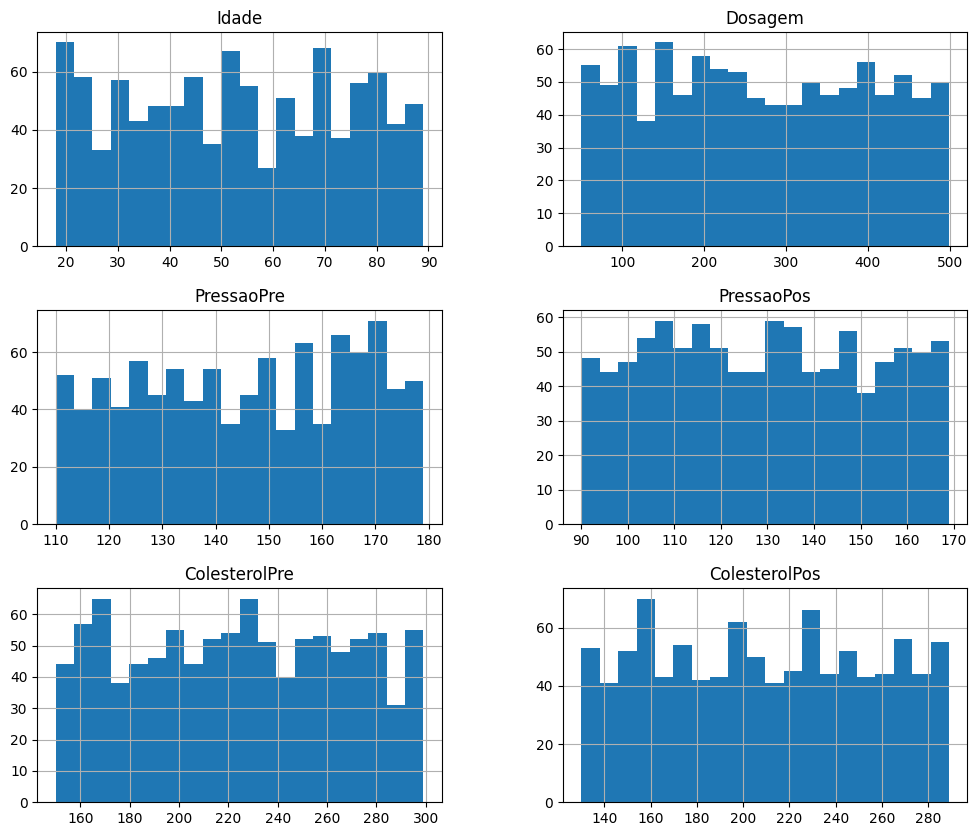

In [ ]:
df[["Idade","Dosagem","PressaoPre","PressaoPos","ColesterolPre","ColesterolPos"]].hist(bins=20,figsize=(12,10))
plt.show()

In [ ]:
df.to_csv("updownsampling.csv",index=False)

In [ ]:
import seaborn as sns

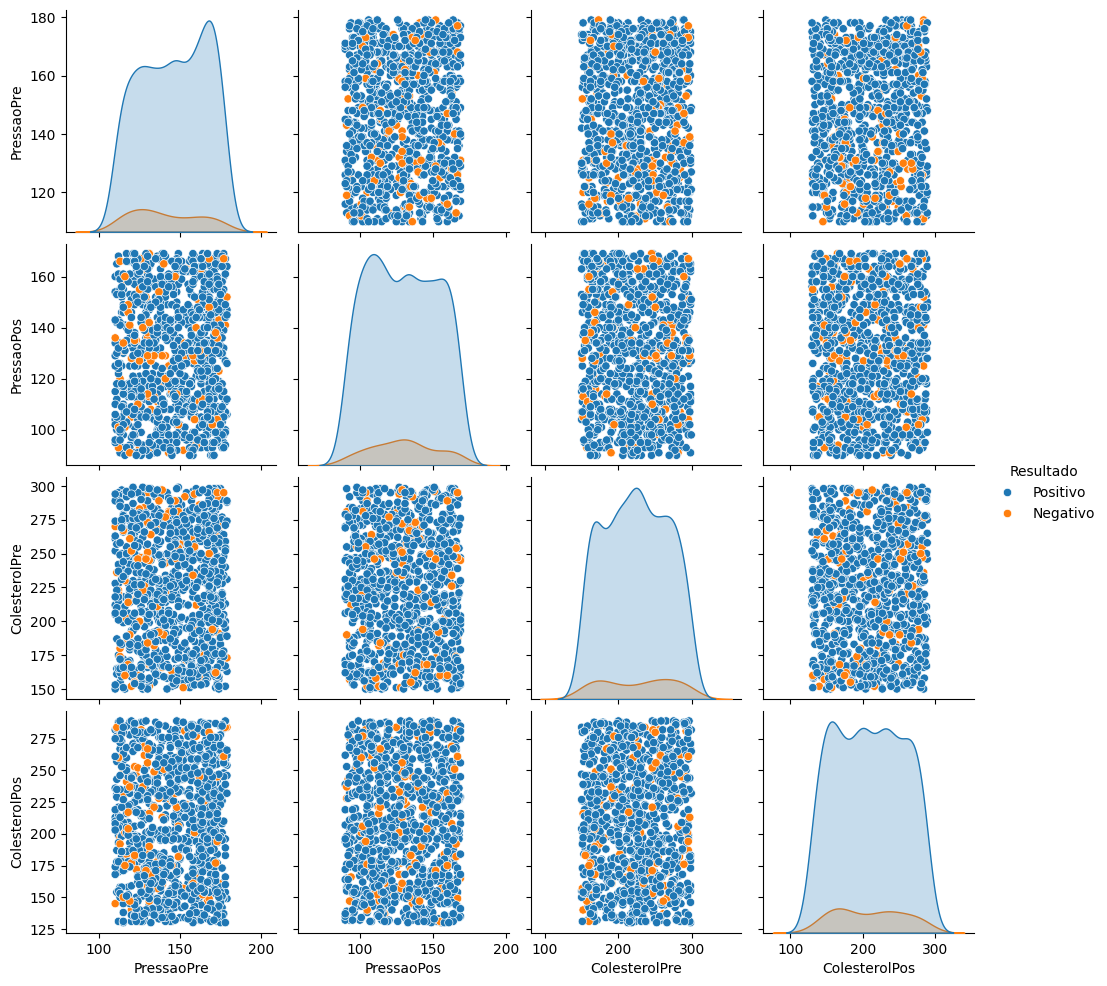

In [ ]:
sns.pairplot(df, vars=['PressaoPre', 'PressaoPos', 'ColesterolPre', 'ColesterolPos'], hue='Resultado')
plt.show()

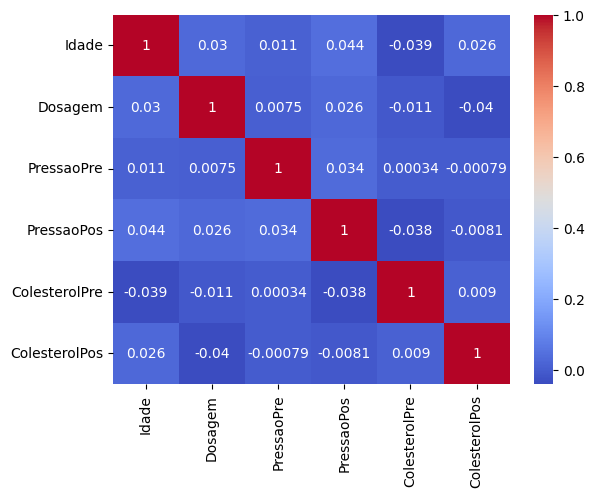

In [ ]:
# Selecionar apenas as colunas numéricas
df_numerico = df.select_dtypes(include=[float, int])

# Calcular a matriz de correlação
matrix_correlacao = df_numerico.corr()

# Plotar o heatmap
sns.heatmap(matrix_correlacao, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df.columns

Index(['Idade', 'Sexo', 'Medicamento', 'Dosagem', 'PressaoPre', 'PressaoPos',
       'ColesterolPre', 'ColesterolPos', 'EfeitoAdverso', 'Resultado'],
      dtype='object')

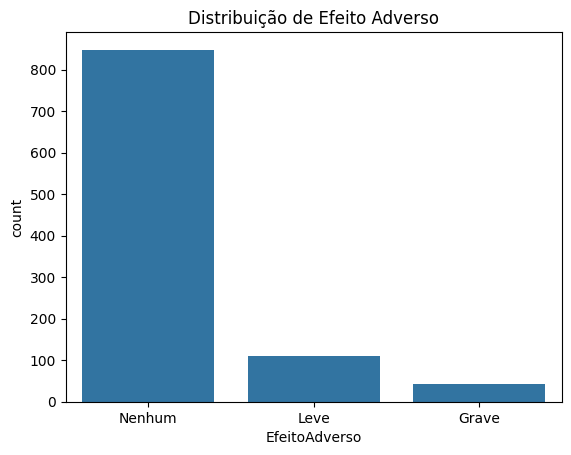

In [ ]:
sns.countplot(x='EfeitoAdverso', data =df)
plt.title("Distribuição de Efeito Adverso")
plt.show()

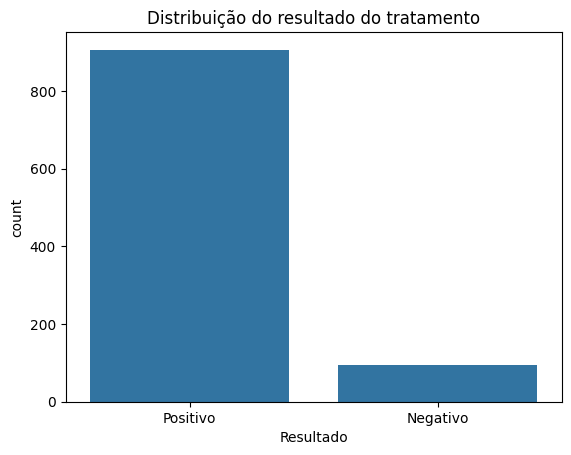

In [ ]:
sns.countplot(x='Resultado',data=df)
plt.title("Distribuição do resultado do tratamento")
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

# Separando as variáveis dependentes e independentes
X = df.drop('Resultado', axis=1)
y = df['Resultado']

# Convertendo variáveis categóricas em dummies
X = pd.get_dummies(X, drop_first=True)

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Função para treinar e avaliar o modelo
def treinar_avaliar_modelo(X_train, y_train, X_test, y_test):
    modelo = RandomForestClassifier(random_state=42)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acuracia = accuracy_score(y_test, y_pred)
    return acuracia

# 1. Treinando com dados desbalanceados
acuracia_desbalanceado = treinar_avaliar_modelo(X_train, y_train, X_test, y_test)
print(f"Acurácia com dados desbalanceados: {acuracia_desbalanceado:.4f}")

# 2. Aplicando Upsampling
X_train_upsampled, y_train_upsampled = resample(X_train[y_train == 'Negativo'],
                                                y_train[y_train == 'Negativo'],
                                                replace=True,
                                                n_samples=len(y_train[y_train == 'Positivo']),
                                                random_state=42)

X_train_upsampled = pd.concat([X_train[y_train == 'Positivo'], X_train_upsampled])
y_train_upsampled = pd.concat([y_train[y_train == 'Positivo'], y_train_upsampled])

acuracia_upsampled = treinar_avaliar_modelo(X_train_upsampled, y_train_upsampled, X_test, y_test)
print(f"Acurácia com upsampling: {acuracia_upsampled:.4f}")

# 3. Aplicando Downsampling
X_train_downsampled, y_train_downsampled = resample(X_train[y_train == 'Positivo'],
                                                    y_train[y_train == 'Positivo'],
                                                    replace=False,
                                                    n_samples=len(y_train[y_train == 'Negativo']),
                                                    random_state=42)

X_train_downsampled = pd.concat([X_train[y_train == 'Negativo'], X_train_downsampled])
y_train_downsampled = pd.concat([y_train[y_train == 'Negativo'], y_train_downsampled])

acuracia_downsampled = treinar_avaliar_modelo(X_train_downsampled, y_train_downsampled, X_test, y_test)
print(f"Acurácia com downsampling: {acuracia_downsampled:.4f}")


Acurácia com dados desbalanceados: 0.8967
Acurácia com upsampling: 0.8900
Acurácia com downsampling: 0.5800



Dados Desbalanceados
Matriz de Confusão:


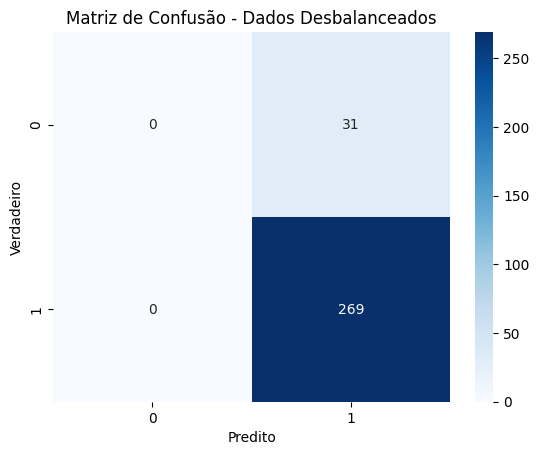


Relatório de Classificação:
              precision    recall  f1-score   support

    Negativo       0.00      0.00      0.00        31
    Positivo       0.90      1.00      0.95       269

    accuracy                           0.90       300
   macro avg       0.45      0.50      0.47       300
weighted avg       0.80      0.90      0.85       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Upsampling
Matriz de Confusão:


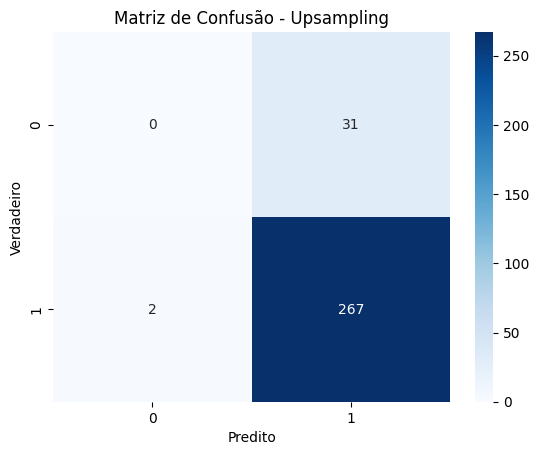


Relatório de Classificação:
              precision    recall  f1-score   support

    Negativo       0.00      0.00      0.00        31
    Positivo       0.90      0.99      0.94       269

    accuracy                           0.89       300
   macro avg       0.45      0.50      0.47       300
weighted avg       0.80      0.89      0.84       300


Downsampling
Matriz de Confusão:


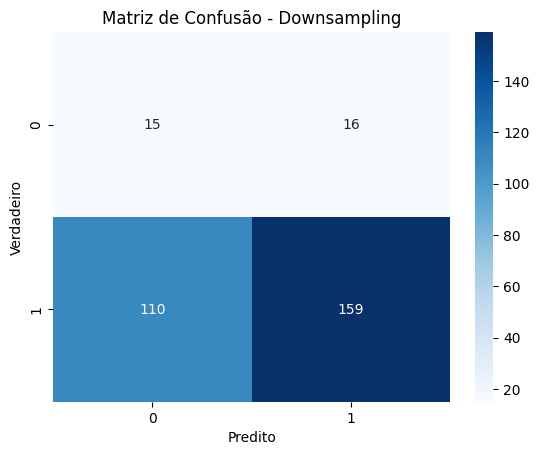


Relatório de Classificação:
              precision    recall  f1-score   support

    Negativo       0.12      0.48      0.19        31
    Positivo       0.91      0.59      0.72       269

    accuracy                           0.58       300
   macro avg       0.51      0.54      0.45       300
weighted avg       0.83      0.58      0.66       300



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Gerar matriz de confusão e relatório de classificação
def avaliar_modelo(y_test, y_pred, title):
    print(f"\n{title}")
    print("Matriz de Confusão:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {title}')
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.show()

    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))

# Treinando o modelo e obtendo previsões
modelo = RandomForestClassifier(random_state=42)

# Dados desbalanceados
modelo.fit(X_train, y_train)
y_pred_desbalanceado = modelo.predict(X_test)
avaliar_modelo(y_test, y_pred_desbalanceado, "Dados Desbalanceados")

# Upsampling
modelo.fit(X_train_upsampled, y_train_upsampled)
y_pred_upsampled = modelo.predict(X_test)
avaliar_modelo(y_test, y_pred_upsampled, "Upsampling")

# Downsampling
modelo.fit(X_train_downsampled, y_train_downsampled)
y_pred_downsampled = modelo.predict(X_test)
avaliar_modelo(y_test, y_pred_downsampled, "Downsampling")


